# Final demo of function

### All feature engineering steps in process_data.ipynb

## In this project I am using spotify playlist data to try to predict how many followers the playlist has

#### I log transform num_followers (y) because of the heavy skew

In [75]:
import pandas as pd

df = pd.read_feather("initial_data.feather")
df.head()

,collaborative,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description,avg_albums_per_artist,avg_tracks_per_album,avg_duration_per_track
0,False,1493424000,52,47,1,[Lose Control (feat. Ciara & Fat Man Scoop) by...,6,11532414,37,False,1.270270,1.106383,221777.192308
1,False,1506556800,39,23,1,"[Eye of the Tiger by Survivor, Libera Me From ...",5,11656470,21,False,1.095238,1.695652,298883.846154
2,False,1505692800,64,51,1,"[Like You by Hoody, GOOD (feat. ELO) by Loco, ...",18,14039958,31,False,1.645161,1.254902,219374.343750
3,False,1501027200,126,107,1,"[Danse macabre by Camille Saint-Saëns, Piano c...",4,28926058,86,False,1.244186,1.177570,229571.888889
4,False,1401667200,17,16,2,"[Tonight, Tonight by The Smashing Pumpkins, Wo...",7,4335282,16,False,1.000000,1.062500,255016.588235


In [76]:
import importlib
import data_processing
importlib.reload(data_processing)

song_counts, total_songs = data_processing.count_tracks(df["tracks"])

df = data_processing.extract_features(df, song_counts, total_songs)

df.head()

,num_edits,num_artists,popularity_score,description,top_artists_count,top_songs_count,modified_at,avg_albums_per_artist,collaborative,avg_song_popularity,num_followers
0,6,37,51.933867,False,9.0,4.0,1493424000,1.270270,False,0.998728,1
1,5,21,38.970604,False,3.0,2.0,1506556800,1.095238,False,0.999246,1
2,18,31,63.997871,False,0.0,0.0,1505692800,1.645161,False,0.999967,1
3,4,86,125.993333,False,0.0,0.0,1501027200,1.244186,False,0.999947,1
4,7,16,16.989535,False,0.0,0.0,1401667200,1.000000,False,0.999384,2


In [77]:
df.describe()

,num_edits,num_artists,popularity_score,top_artists_count,top_songs_count,modified_at,avg_albums_per_artist,avg_song_popularity,num_followers
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,17.971960,38.240120,66.842496,9.87918,2.611660,1.476620e+09,1.357856,0.999303,2.623580
std,20.945009,30.268049,53.759645,16.15233,4.728626,3.653668e+07,0.531061,0.000566,103.683259
min,2.000000,3.000000,4.982998,0.00000,0.000000,1.310602e+09,0.061728,0.995922,1.000000
25%,5.000000,16.000000,25.994889,0.00000,0.000000,1.459555e+09,1.101124,0.998968,1.000000
50%,10.000000,30.000000,49.950003,4.00000,1.000000,1.490573e+09,1.236364,0.999413,1.000000
75%,23.000000,52.000000,91.986229,12.00000,3.000000,1.505693e+09,1.454545,0.999770,1.000000
max,185.000000,212.000000,249.986057,200.00000,53.000000,1.509494e+09,22.666667,0.999997,15842.000000


In [78]:
import data_normalizer
importlib.reload(data_normalizer)
DataNormalizer = data_normalizer.DataNormalizer

normalizer = DataNormalizer(columns_to_normalize=df.columns, log_transform_columns = [
    'num_edits', 'top_artists_count', 'top_songs_count', 'num_followers'
])
df_normalized = normalizer.fit_transform(df)
df_normalized.describe()

,num_edits,num_artists,popularity_score,description,top_artists_count,top_songs_count,modified_at,avg_albums_per_artist,collaborative,avg_song_popularity,num_followers
count,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04
mean,5.250911e-17,8.668621e-17,-3.502976e-17,4.554579e-17,2.086153e-16,1.040235e-16,-3.028546e-15,-2.519585e-16,2.351896e-17,-2.423960e-13,5.098144e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-1.489467e+00,-1.164280e+00,-1.150679e+00,-1.365325e-01,-1.214647e+00,-8.605774e-01,-4.543933e+00,-2.440663e+00,-1.505397e-01,-5.978769e+00,-4.383594e-01
25%,-7.462870e-01,-7.347795e-01,-7.598267e-01,-1.365325e-01,-1.214647e+00,-8.605774e-01,-4.670683e-01,-4.834386e-01,-1.505397e-01,-5.935646e-01,-4.383594e-01
50%,-9.626589e-02,-2.722410e-01,-3.142257e-01,-1.365325e-01,3.163163e-02,-9.828369e-02,3.818843e-01,-2.287760e-01,-1.505397e-01,1.940880e-01,-4.383594e-01
75%,7.390269e-01,4.546054e-01,4.677111e-01,-1.365325e-01,7.715381e-01,6.640101e-01,7.957191e-01,1.820693e-01,-1.505397e-01,8.242441e-01,-4.383594e-01
max,2.935072e+00,5.740760e+00,3.406745e+00,7.324262e+00,2.892002e+00,3.526337e+00,8.997690e-01,4.012537e+01,6.642767e+00,1.226335e+00,2.454911e+01


In [79]:
X = df_normalized.drop(columns=["num_followers"])
y = df_normalized["num_followers"]

In [106]:
import importlib
import final_function
importlib.reload(final_function)

result = final_function.regression(X, y, "predictive")

In [107]:
result

{'model': RidgeCV(alphas=[0.1, 1, 10, 100], cv=5),
 'best_model_name': 'Ridge',
 'mse': np.float64(0.882156420877002),
 'r2': 0.05531693561248696,
 'diagnostics': None,
 'predictions': array([-0.15535486, -0.29295799, -0.0647171 , ..., -0.17927294,
         0.40130798, -0.16844563]),
 'actual': 33553   -0.438359
 9427    -0.438359
 199      2.619513
 12447    0.690210
 39489   -0.438359
            ...   
 28567   -0.438359
 25079   -0.438359
 18707    2.619513
 15200    1.490943
 5857    -0.438359
 Name: num_followers, Length: 10000, dtype: float64}

In [108]:
result['predictions']

array([-0.15535486, -0.29295799, -0.0647171 , ..., -0.17927294,
        0.40130798, -0.16844563])

In [109]:
predictions = normalizer.reverse_predictions(result['predictions'], 'num_followers')
actual = normalizer.reverse_predictions(result['actual'], 'num_followers')
predictions

array([1.21404954, 1.10725479, 1.287334  , ..., 1.19510543, 1.70423048,
       1.20366095])

### Testing results myself

In [111]:
print('total, predicted, correctly matched, missed')
for i in range(10):
    print(str(len(predictions)) + ',', str(len(predictions[predictions >= (1.5 + (i / 10))])) + ',', str(len(predictions[(predictions >= (1.5 + (i / 10))) & (actual >= (1.5 + (i / 10)))])) + ',', len(predictions[(predictions < (1.5 + (i / 10))) & (actual >= (1.5 + (i / 10)))]))

total, predicted, correctly matched, missed
10000, 1839, 724, 1749
10000, 1101, 471, 2002
10000, 602, 263, 2210
10000, 299, 139, 2334
10000, 133, 63, 2410
10000, 72, 38, 2435
10000, 40, 15, 986
10000, 28, 10, 991
10000, 15, 4, 997
10000, 9, 2, 999


#### This reflects the poor values of r2 and mse. It misses the majority of num_followers > 1, and even of the ones it thinks are over 1, it's still wrong about those about 2/3 of the time

#### This is likely to come down to the conditioning of y. num_followers had an extremely heavy skew as shown by process_data.ipynb, which couldn't even be somewhat fixed by log transform. This lead to poor predictive results.

In [112]:
import importlib
import final_function
importlib.reload(final_function)

result = final_function.regression(X, y, "explanatory")

In [116]:
print(result['diagnostics']['coefficients'])

num_edits                0.106402
num_artists              0.038638
popularity_score         0.086622
description              0.073155
top_artists_count       -0.026419
top_songs_count          0.021888
modified_at             -0.015595
avg_albums_per_artist    0.012505
collaborative            0.005089
avg_song_popularity      0.009937
dtype: float64


#### This shows that num_edits was the best predictor of num_followers, and that for a 1 unit increase of num_edits, num_followers increased 0.1. However since everything was normalized, this means this still wasn't a good predictor, only the best out of them all.

#### Overall none of the predictors were good, as was seen by the predictive results. This is likely also related to how heavily skewed num_followers was, and how over 75% of the column was 1.

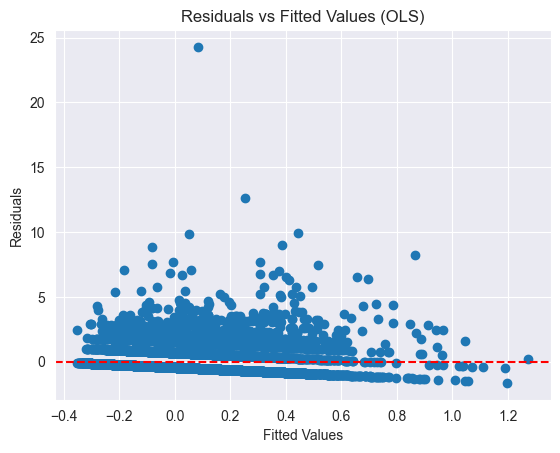

In [117]:
import matplotlib.pyplot as plt
residuals = result['actual'] - result['predictions']
plt.scatter(result['predictions'], residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (OLS)")
plt.show()

### Issues

#### It appears that there might be a missing non-linear relationship

#### There is a line of residuals under the line, seemingly from y being integers from 1-15842, but I believe the blank line is from the gap between 1 and 2.

#### It's also heavily influenced by these massive outliers, although I didn't want to remove the outliers because by doing a simple outlier removal, it removed everything other than the 1s. Because how skewed the data is makes everything an outlier. Although after going back and doing further outlier detection, that doesn't seem to be the case anymore and num_followers up to about 400 is preserved, so maybe I should have removed outliers. Although it is these outliers that give character to the dataset I feel, as a viral playlist is the most important one.

## Summary of Results

- **Best Model**: Ridge Regression
- **Performance Metrics**:
  - Mean Squared Error (MSE): 0.8821
  - R² Score: 0.0553

- **Feature Importance**:
  - `num_edits` was the strongest predictor (0.1 increase per 1 standard deviation increase in edits), but still weak.
  - Other predictors contributed minimally.

- **Challenges**:
  - Target variable `num_followers` was heavily skewed, with over 75% of values equal to 1.
  - Outliers and gaps in the data affected predictive performance.

- **Conclusion**:
  - The model struggled to predict `num_followers` accurately due to data skewness and outliers. Further improvements may require non-linear models or more robust transformations.